In [2]:
# 导入包
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 画图
import seaborn as sns
%matplotlib inline
# 在notebook中展示图

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# 图的中文显示有问题

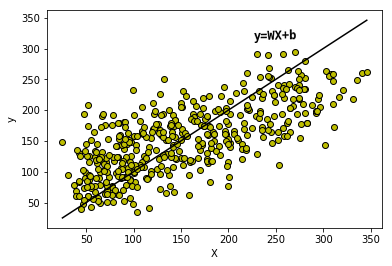

In [32]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
X, y = datasets.load_diabetes(return_X_y=True)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0),color='y')
ax.plot([y.min(), y.max()], [y.min(), y.max()],color='black')
ax.set_xlabel('X')
ax.set_ylabel('y')

ax.text(x=250,#文本x轴坐标 
         y=320, #文本y轴坐标
         s='y=WX+b', #文本内容
         rotation=1,#文字旋转
         ha='center',#x=2.2是文字的左端位置，可选'center', 'right', 'left'
         va='center',#y=8是文字的低端位置，可选'center', 'top', 'bottom', 'baseline', 'center_baseline'
         fontdict=dict(fontsize=12, color='black',
                       family='monospace',#字体,可选'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
                       weight='bold',#磅值，可选'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'
                      
                      )#字体属性设置
        )

plt.show()



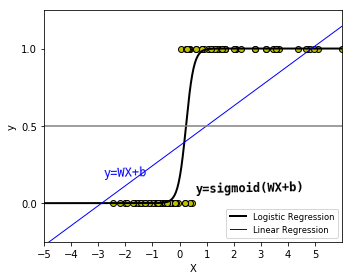

In [82]:



# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
import random


# X=np.random.uniform(xmin, xmax,n_samples)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(5, 4))
plt.clf()
plt.scatter(X.ravel(), y, edgecolors=(0, 0, 0),color='y')
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='black', linewidth=2)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1,color='b')
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 6))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-5,6)
plt.legend(('Logistic Regression', 'Linear Regression'),
           loc="lower right", fontsize='small')


plt.text(x=-2,#文本x轴坐标 
         y=.2, #文本y轴坐标
         s='y=WX+b', #文本内容
         rotation=1,#文字旋转
         ha='center',#x=2.2是文字的左端位置，可选'center', 'right', 'left'
         va='center',#y=8是文字的低端位置，可选'center', 'top', 'bottom', 'baseline', 'center_baseline'
         fontdict=dict(fontsize=12, color='b',
                       family='monospace',#字体,可选'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
                       weight='normal',#磅值，可选'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'
                      
                      )#字体属性设置
        )


plt.text(x=.6,#文本x轴坐标 
         y=0.1, #文本y轴坐标
         s='y=sigmoid(WX+b)', #文本内容
         rotation=1,#文字旋转
         ha='left',#x=2.2是文字的左端位置，可选'center', 'right', 'left'
         va='center',#y=8是文字的低端位置，可选'center', 'top', 'bottom', 'baseline', 'center_baseline'
         fontdict=dict(fontsize=12, color='black',
                       family='monospace',#字体,可选'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
                       weight='bold',#磅值，可选'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'
                      
                      )#字体属性设置
        )
plt.tight_layout()

plt.show()


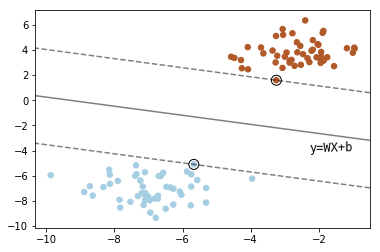

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=100, centers=2, random_state=66)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)



# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


ax.text(x=-1,#文本x轴坐标 
         y=-4, #文本y轴坐标
         s='y=WX+b', #文本内容
         rotation=1,#文字旋转
         ha='right',#x=2.2是文字的左端位置，可选'center', 'right', 'left'
         va='baseline',#y=8是文字的低端位置，可选'center', 'top', 'bottom', 'baseline', 'center_baseline'
         fontdict=dict(fontsize=12, color='black',
                       family='monospace',#字体,可选'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
                       weight='normal',#磅值，可选'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'
                      
                      )#字体属性设置
        )


plt.show()

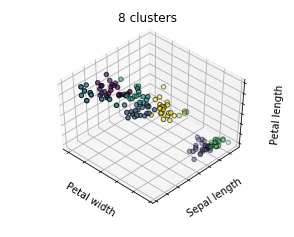

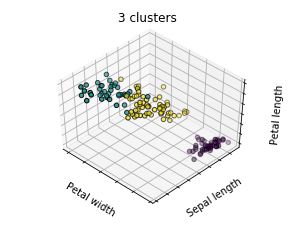

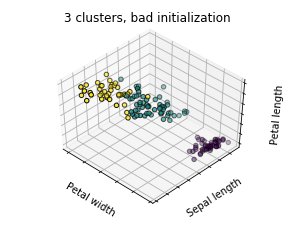

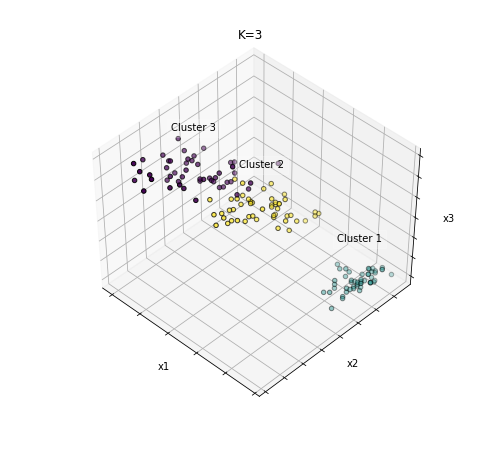

In [112]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(7, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Cluster 1', 0),
                    ('Cluster 2', 1),
                    ('Cluster 3', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('K=3')
ax.dist = 12

fig.show()